# Curse of Dimensionality Simulation - Lab

## Introduction

The Curse of Dimensionality as we saw earlier, is one of the key problems in multivariate machine learning with high dimensional data. It appears in many different forms, but all of them have the same net form and source: the fact that points in high-dimensional space are highly sparse, and this leads to overfitting. In this lab, we shall try to simulate this problem see how it manifests itself in s simple experimental setup. 

__Note: You are advised to read the [additional document on hypercubes](http://www.maths.manchester.ac.uk/~mlotz/teaching/suprises.pdf) referenced the previous lesson before attempting these simulations.__

## Objectives

You will be able to:

- Understand how dimensionality effects the probability space and the accuracy of each observation
- Simulate the effect of distance between observations as dimensionality increases
- Simulate the effect of dimensionality on the volume of hypercubes. 

## Dimensionality vs. Probability Space
Let us consider probability space for one variable represented by the unit interval (0, 1). Imagine drawing ten samples along that interval. On such a 1D interval (a straight line), __each sample would represent 10% of the probability space__. You could imagine a straight line , divided into ten sections.  
<img src="1D.png" width=300>

Now consider a second feature defined on another orthogonal (perpendicular) (0, 1) interval, also being represented by ten samples. We now have 10 $(x1 , x2)$ points on a plane defined by the orthogonal x1 , x2 lines, and representing a new probability space. This is shown below:


![](curse_1.gif)

Now we have a new feature space that has $10 X 10 = 100$ area units, __so each of the ten points now represents only 1% of the probability space__. We now need require 100 points, in order for each point to represent the same 10% of the probability space that was represented by 10 points in only one dimension. Now, although there are 100 $(x1 , x2)$ points, neither axis has more __accuracy__ than previous 10 on a single axis, because there are 10 values of x1 required for the 10 different values of x2 necessary to represent the new probability plane. 

Taking this further,consider adding a third dimension creating a probability space represented by a __cube__ with ten units on a side, and 1000 probability units within. We need to stack 10 of the previous $(x1 , x2)$ planes to construct the new $(x1 , x2 , x3)$ cube, and of course 10 times the number of samples per axis to maintain the former level of accuracy, or probability coverage. This is shown below:

![](cube.gif)

We can conclude that $10^n$ samples would be required for a n-dimension problem. This is the "curse of dimensionality" .In practice when the samples are taken at random, it appears as though there are more samples, but this isn't the case in terms of probability space coverage which is related to the density of points, not the number of observations per axis.

## Dimensionality vs. Euclidean Distance

Let's simulate the above behavior with two points only which lie at 0 and 1 on a single dimension, at a unit length from each other. Suppose we introduce a second axis of "data", again distributed a unit distance away. Now we have two points, (0,0) and (1,1). But the distance between the points has grown to $\sqrt{2}$ according to Euclidean distance $$d(x,y) = \sqrt{(x_1 - y_1)^2 +.....(X_N - y_N)^2}$$

if we add a third dimension, the two points (0, 0, 0) and (1, 1, 1) will be $\sqrt{3}$ away, and so on. By the time we reach 10 dimensions, the two points are now a distance of 3 away from one another: thrice as far as they were when the data was 1-dimensional: 

### Simulate the above scanario and plot the output as a line plot with number of dimensions on x-axis and euclidean distance at Y-axis as shown in the output 

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

dist = []
for n in range(1, 11):
    a = np.zeros(n)
    b = np.ones(n)
    dist.append(np.linalg.norm(a-b))

Text(0,0.5,'||a-b||_2')

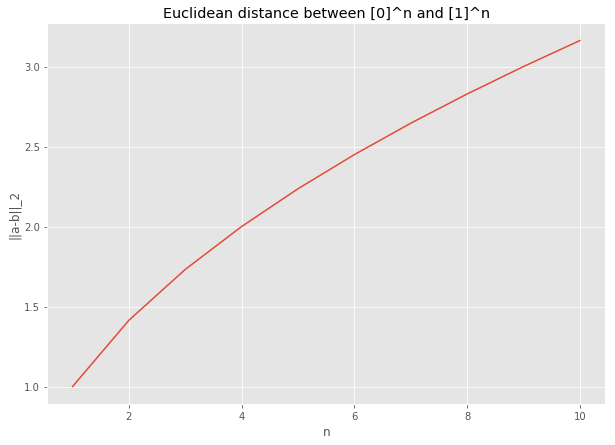

In [11]:
plt.style.use('ggplot')
plt.figure(figsize=(10, 7))
plt.plot(list(range(1, 11)), dist)
plt.title(r'Euclidean distance between [0]^n and [1]^n')
plt.xlabel('n')
plt.ylabel('||a-b||_2')

## Dimensionality vs. Volume of a Hypercube
Let's formalize it a bit more. Consider a  p -dimensional hypercube with unit volume. Suppose that we have $n$  data points uniformally distributed inside the hypercube. The volume (area) of a square is  $e^2$ , where  $e$  is the edge length; the volume of a cube is  $e^3$ , and so on . Hence the volume of a  p -dimensional hypercube is given by:

$$Vp=1=e^p$$
 
Let  $r$  be the ratio of points inside the cube which are within some neighborhood. To capture an $r$ with maximum points in the data, we need to grow a cube which takes up $r$ of the unit cube's volume. Since the length of an edge on the cube is simply 1, we have:

$$r=e^p$$
 
Expressed in terms of  $e_p$ , the edge length necessary to fill a p-dimensional -hypercube, we have that:

$$e_p(r)=r^{1/p}$$
 
This means, in order to capture 10% (0.1) of the samples in 2 dimensions, we need  $e_2(.1)=(.1)^{1/2}=0.31$. 

But in 10-d space we need $e_10(.1)=(.1)^1/10=0.8$ , or 80 percent of the volume of the cube. 

### Use $e_p(r)=r^{1/p}$ to calculate percentage of volume covered for p = [1,..,10]. Produce the output as shown below:

In [12]:
from collections import defaultdict
store = defaultdict(list)

for i, r in enumerate([.1, .2, .33, .5, .8]):
    for p in range(1, 11):
        store[f'r = {100*r}%'].append(r**(1/p))

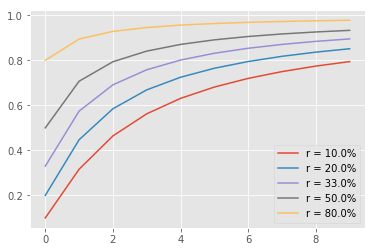

In [14]:
df = pd.DataFrame(store)
df.plot()

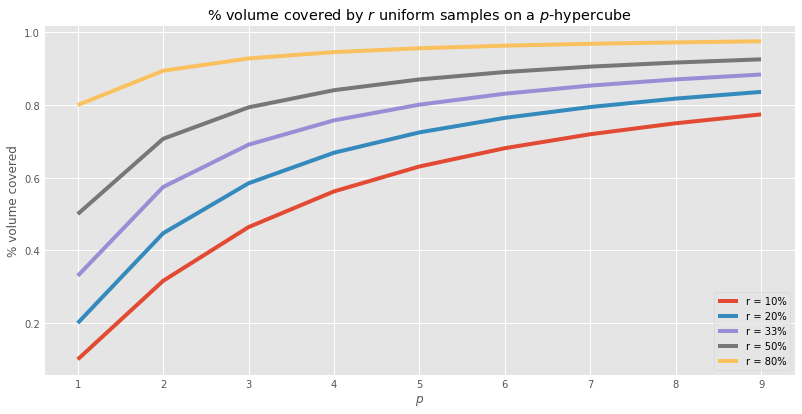

In [5]:
# Your code here 

### Observation 1
> We see that as   $p$  grows, the proportion of volume of the hypercube that we need ($r$) also grows. 

What starts out needing just 10% of the volume grows to needing almost 80% of the volume as we see in the plot above. 

### Observation 2

> The growth is uneven across the percentage  $r$  we want to capture. 

To capture 80% of the points, we start out needing 80% of the volume and end up needing ~95% of it. This is more than we needed to start with, but a significantly slower rate of growth than the 10%-to-80% growth to get 10% of  r.  

## Summary 

In this lesson, we looked at curse of dimensionality and saw how this issues manifests itself as the number of dimensions grow. We ran a couple of simulations based on the developed intuitions to conclude the two observations given at the end.  